# Chain Rule Example: Optimizing a Neural Network


In this example, we will optimize a simple neural network with one input, one hidden neuron, and one output neuron.
The focus will be on using the chain rule to calculate gradients and update parameters step by step.

### Network Structure:
1. Input $x$
2. Hidden layer:
   - Weight: $w_1$
   - Bias: $b_1$
   - Activation: Sigmoid function
3. Output layer:
   - Weight: $w_2$
   - Bias: $b_2$
   - Activation: Sigmoid function



## Step 1: Forward Pass

1. **Hidden Layer Output**:
   $$
   h = \sigma(x w_1 + b_1)
   $$
   where $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the Sigmoid activation.

2. **Output Layer**:
   $$
   \hat{y} = \sigma(h w_2 + b_2)
   $$



## Step 2: Compute Loss

We use the Mean Squared Error (MSE) loss function:
$$
L = (y - \hat{y})^2
$$
where $y$ is the true label.



## Step 3: Backward Pass (Using the Chain Rule)

1. **Gradient of Loss with Respect to Output**:
   $$
   \frac{\partial L}{\partial \hat{y}} = -2 (y - \hat{y})
   $$

2. **Gradient of Output with Respect to $w_2$**:
   $$
   \frac{\partial \hat{y}}{\partial w_2} = h \cdot \sigma'(h w_2 + b_2)
   $$
   where $\sigma'(z) = \sigma(z)(1 - \sigma(z))$.

3. **Gradient of Loss with Respect to $w_2$**:
   $$
   \frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_2}
   $$

4. **Repeat for $b_2$, $w_1$, and $b_1$**.

### Example Values:
Let:
- $x = 1$, $y = 0.5$
- $w_1 = 0.4$, $b_1 = 0.2$, $w_2 = 0.7$, $b_2 = 0.1$
- Learning rate $\alpha = 0.1$


# Visualization using a small software

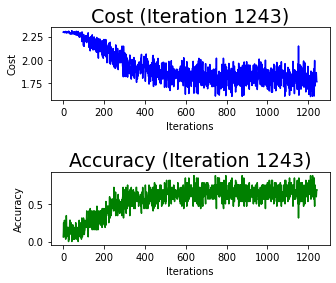

In [1]:
import tkinter as tk
from tkinter import Canvas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

class NeuralNetworkVisualizer:
    def __init__(self, root):
        self.root = root
        self.root.title("Neural Network Backpropagation Visualizer")

        # Load MNIST dataset
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
        train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
        self.train_loader = iter(torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True))

        # Create the canvas for neural network visualization
        self.canvas = Canvas(root, width=1000, height=800, bg="white")
        self.canvas.grid(row=0, column=0, rowspan=3)

        # Create the matplotlib figures for cost and accuracy
        self.fig, (self.ax_cost, self.ax_accuracy) = plt.subplots(2, 1, figsize=(5, 4))
        self.fig.subplots_adjust(hspace=1)  # Add padding between plots

        self.ax_cost.set_title("Cost")
        self.ax_cost.set_xlabel("Iterations")
        self.ax_cost.set_ylabel("Cost")
        self.ax_accuracy.set_title("Accuracy")
        self.ax_accuracy.set_xlabel("Iterations")
        self.ax_accuracy.set_ylabel("Accuracy")

        self.canvas_plt = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas_plt.get_tk_widget().grid(row=0, column=1, sticky="n")
        
            # Add copyright information below the plots
        self.copyright_label = tk.Label(root, text="© Amir H. Daraie, January 2025\nStatistical Foundation of Neural Data Science\nJohns Hopkins University",
                                        font=("Helvetica", 18), justify="center")
        self.copyright_label.grid(row=2, column=1, pady=(20, 0), sticky="s")

        # Initialize parameters
        self.init_network()
        self.cost_history = []
        self.accuracy_history = []
        self.iteration = 0

        # Start the visualization
        self.update_visualization()

    def init_network(self):
        # Define a smaller network for better visualization
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 10),
            nn.Softmax(dim=1)
        )
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.1)

    def forward_and_backward_pass(self, X, y):
        self.optimizer.zero_grad()
        outputs = self.model(X)
        loss = self.criterion(outputs, y)
        loss.backward()
        self.optimizer.step()
        return loss.item(), outputs

    def compute_accuracy(self, y_pred, y):
        predictions = torch.argmax(y_pred, dim=1)
        true_labels = torch.argmax(y, dim=1)
        return (predictions == true_labels).float().mean().item()

    def update_visualization(self):
        try:
            X, y = next(self.train_loader)
        except StopIteration:
            self.train_loader = iter(torch.utils.data.DataLoader(dataset=datasets.MNIST(root="./data", train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])), batch_size=32, shuffle=True))
            X, y = next(self.train_loader)

        X = X.view(-1, 28 * 28)  # Flatten the input images
        y_one_hot = torch.zeros(y.size(0), 10).scatter_(1, y.unsqueeze(1), 1)  # Convert to one-hot encoding

        # Perform forward and backward pass
        loss, y_pred = self.forward_and_backward_pass(X, y_one_hot)

        # Update cost and accuracy
        accuracy = self.compute_accuracy(y_pred, y_one_hot)
        self.cost_history.append(loss)
        self.accuracy_history.append(accuracy)
        self.iteration += 1

        # Update plots
        self.ax_cost.clear()
        self.ax_accuracy.clear()
        self.ax_cost.plot(self.cost_history, color="blue")
        self.ax_cost.set_title(f"Cost (Iteration {self.iteration})", fontsize=19)
        self.ax_cost.set_xlabel("Iterations")
        self.ax_cost.set_ylabel("Cost")
        self.ax_accuracy.plot(self.accuracy_history, color="green")
        self.ax_accuracy.set_title(f"Accuracy (Iteration {self.iteration})", fontsize=19)
        self.ax_accuracy.set_xlabel("Iterations")
        self.ax_accuracy.set_ylabel("Accuracy")
        self.canvas_plt.draw()

        # Visualize the weights on the canvas
        self.canvas.delete("all")
        self.draw_network()

        if self.iteration < 10000:
            self.root.after(100, self.update_visualization)

    def draw_network(self):
        # Centralize the columns of neurons vertically
        canvas_height = int(self.canvas['height'])
        # input_positions = self.center_positions([(100, i * 20 + 50) for i in range(8)], canvas_height)
        # hidden_positions1 = self.center_positions([(400, i * 30 + 50) for i in range(16)], canvas_height)
        # hidden_positions2 = self.center_positions([(600, i * 30 + 50) for i in range(8)], canvas_height)
        # output_positions = self.center_positions([(800, i * 30 + 50) for i in range(10)], canvas_height)

        input_positions = self.center_positions([(100, i * 30 + 50) for i in range(8)], canvas_height)
        hidden_positions1 = self.center_positions([(400, i * 45 + 50) for i in range(16)], canvas_height)
        hidden_positions2 = self.center_positions([(600, i * 45 + 50) for i in range(8)], canvas_height)
        output_positions = self.center_positions([(800, i * 45 + 50) for i in range(10)], canvas_height)

        for x, y in input_positions:
            self.canvas.create_oval(x - 5, y - 5, x + 5, y + 5, fill="blue")
        for x, y in hidden_positions1:
            self.canvas.create_oval(x - 10, y - 10, x + 10, y + 10, fill="red")
        for x, y in hidden_positions2:
            self.canvas.create_oval(x - 10, y - 10, x + 10, y + 10, fill="orange")
        for x, y in output_positions:
            self.canvas.create_oval(x - 10, y - 10, x + 10, y + 10, fill="green")

        # Draw weights as lines with color intensity proportional to weight value
        with torch.no_grad():
            weights_input_hidden1 = self.model[0].weight
            weights_hidden1_hidden2 = self.model[2].weight
            weights_hidden2_output = self.model[4].weight

        for i, (x1, y1) in enumerate(input_positions[:weights_input_hidden1.size(1)]):
            for j, (x2, y2) in enumerate(hidden_positions1):
                weight = weights_input_hidden1[j, i].item()
                color, alpha = self.get_weight_color_and_alpha(weight)
                self.canvas.create_line(x1, y1, x2, y2, fill=color, width=2, stipple=self.get_stipple(alpha))

        for i, (x1, y1) in enumerate(hidden_positions1):
            for j, (x2, y2) in enumerate(hidden_positions2):
                weight = weights_hidden1_hidden2[j, i].item()
                color, alpha = self.get_weight_color_and_alpha(weight)
                self.canvas.create_line(x1, y1, x2, y2, fill=color, width=2, stipple=self.get_stipple(alpha))

        for i, (x1, y1) in enumerate(hidden_positions2):
            for j, (x2, y2) in enumerate(output_positions):
                weight = weights_hidden2_output[j, i].item()
                color, alpha = self.get_weight_color_and_alpha(weight)
                self.canvas.create_line(x1, y1, x2, y2, fill=color, width=2, stipple=self.get_stipple(alpha))

    def center_positions(self, positions, canvas_height):
        """Center neuron positions vertically."""
        total_height = positions[-1][1] - positions[0][1]
        offset = (canvas_height - total_height) // 2 - 50  # Add a negative offset to move up
        return [(x, y + offset) for x, y in positions]

    def get_weight_color_and_alpha(self, weight):
        """Get color and transparency based on weight value."""
        weight_norm = max(min(weight, 1), -1)  # Normalize weight to [-1, 1]
        if weight_norm > 0:
            r = int(255 * weight_norm)
            color = f"#{r:02x}0000"  # Red for positive weights
        else:
            b = int(255 * -weight_norm)
            color = f"#0000{b:02x}"  # Blue for negative weights
        alpha = int(255 * abs(weight_norm))  # Transparency proportional to magnitude
        return color, alpha

    def get_stipple(self, alpha):
        """Determine stipple pattern based on alpha (transparency)."""
        if alpha > 200:
            return ""
        elif alpha > 100:
            return "gray50"
        else:
            return "gray25"


if __name__ == "__main__":
    root = tk.Tk()
    app = NeuralNetworkVisualizer(root)
    root.mainloop()
